In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('histogram.csv')
dataset = df['Dataset'].values

In [3]:
intervals = 10
interval_width = (dataset.max() - dataset.min()) / intervals
interval_width

92.3

In [4]:
relative_frequency = []
interval_start = []
interval_end = []
absolute_frequency = []


In [5]:
for i in range(0, intervals-1):
    if i==0:
        interval_start.append(dataset[0])
    interval_start.append(interval_start[i] + interval_width)
interval_start = [round(x) for x in interval_start]
interval_start

[13, 105, 198, 290, 382, 474, 567, 659, 751, 844]

In [6]:
for i in range(0, intervals):
    interval_end.append(interval_start[i] + interval_width)
interval_end = [round(x) for x in interval_end]
interval_end

[105, 197, 290, 382, 474, 566, 659, 751, 843, 936]

In [7]:
index=0
for i in range(0, intervals):
    count = 0
    for j in range(index, len(dataset)):
        if (dataset[j] >= interval_start[i]) & (dataset[j] <= interval_end[i]):
            count+=1
    index += count
    absolute_frequency.append(count)
absolute_frequency

[2, 2, 2, 1, 1, 3, 2, 3, 1, 3]

In [8]:
for num in absolute_frequency:
    relative_frequency.append(num / np.sum(absolute_frequency))

relative_frequency = [round(x, 2) for x in relative_frequency]
relative_frequency

[0.1, 0.1, 0.1, 0.05, 0.05, 0.15, 0.1, 0.15, 0.05, 0.15]

In [9]:
frequency_distribution_table = pd.DataFrame({"Interval start": interval_start, "Interval end": interval_end, "Absolute frequency": absolute_frequency, "Relative frequency": relative_frequency})
frequency_distribution_table

,Interval start,Interval end,Absolute frequency,Relative frequency
0,13,105,2,0.10
1,105,197,2,0.10
2,198,290,2,0.10
3,290,382,1,0.05
4,382,474,1,0.05
5,474,566,3,0.15
6,567,659,2,0.10
7,659,751,3,0.15
8,751,843,1,0.05
9,844,936,3,0.15


In [10]:
interval_start = frequency_distribution_table['Interval start']
interval_end = frequency_distribution_table['Interval end']
absolute_frequenty = frequency_distribution_table['Absolute frequency']


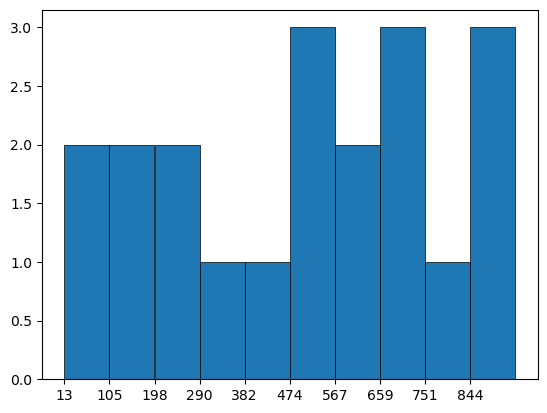

In [16]:
plt.bar(x = interval_start, height = absolute_frequency, width = interval_end - interval_start, align = 'edge', linewidth = 0.5, edgecolor = 'black')
plt.xticks(interval_start)
plt.show()